# Configuring Notebook

1. Follow the "GETTING STARTED" steps laid out in the README first
1. Click "Select Kernel" in upper right corner of this pane
1. Click "Python Environments..."
1. Click ".venv (Python 3.12.3)"
1. Click "Run All"
1. When prompted if you want to install ipykernel, click "Install"

In [1]:
import torch
import numpy as np
import pandas as pd

from fy_bot.project import create_project, delete_project, project_exists
from fy_bot.datasource import add_document, compile_corpus, add_youtube_video
from fy_bot.context_generation import generate_context_question
from fy_bot.context_generation import format_data
from fy_bot.gpt2_model import train as train, chat

import matplotlib.pyplot as plt

torch.cuda.empty_cache()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

PROJECT_NAME = "tax_examples"

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


cuda


## First we create a project

Projects house all of the data for an experiment including all of the raw datasources, model, weights/biases, context (questions/answers)

In [37]:
# This notebook will start from scratch
# So, if the project already exists delete it
# and create a new project
if project_exists(PROJECT_NAME):
    delete_project(PROJECT_NAME)

create_project(PROJECT_NAME)

2024-08-03 23:49:13:INFO:Deleting project: tax_examples...
2024-08-03 23:49:13:INFO:Project deleted.
2024-08-03 23:49:13:INFO:Creating new project: tax_examples...
2024-08-03 23:49:13:INFO:Project Created.


## Next we add data sources to the project

We use add_document with a url to download the ebook or pdf. Once the document is downloaded it is placed in the downloads folder of the project. The document is then scraped for raw text. The raw text is saved in the raw folder of the project.

For YouTube video transcripts the add_youtube_video method is called with a video id. Since the transcripts come without punctuation (and lose some context because of this), the transcript is ran through the "oliverguhr/fullstop-punctuation-multilang-large" model to put some punctuation in place. Once punctuation is added to the transcript we store this text in the raw folder of the project.

In [38]:
# Adding documents to the project downloads this file
# and puts it in the "downloads" folder of the project
# It then extracts the raw text from the downloaded file
# and saves it in the "raw" folder of the project
# Beginner tips
add_document(PROJECT_NAME, "https://notis-consulting.net/sites/default/files/Documents/Personal%20Financial%20Planning%20Guide.pdf")
add_document(PROJECT_NAME, "https://scc.virginia.gov/getattachment/6c7f5ba0-a15d-4bcc-93a3-56041dabd97f/16_iptbasics.pdf")
add_document(PROJECT_NAME, "https://www.dol.gov/sites/dolgov/files/legacy-files/ebsa/about-ebsa/our-activities/resource-center/publications/savings-fitness.pdf")
add_document(PROJECT_NAME, "https://g.foolcdn.com/img/editorial/external_m/book/motleyfool-investingforbeginners.pdf")
add_document(PROJECT_NAME, "https://www.jpmorgan.com/content/dam/jpm/securities/documents/guide-to-mutual-fund-investing.pdf")
add_document(PROJECT_NAME, "https://dfr.oregon.gov/help/outreach-education/Documents/publications/2860-Wise-investing.pdf")
add_document(PROJECT_NAME, "https://corporate.vanguard.com/content/dam/corp/research/pdf/vanguards_principles_for_investing_success.pdf")
add_document(PROJECT_NAME, "https://yis.org/wp-content/uploads/2016/10/Stock-Investing-101-eBook.pdf")
add_document(PROJECT_NAME, "https://www.plainenglish.co.uk/files/financialguide.pdf")
add_document(PROJECT_NAME, "https://www.securities.nd.gov/sites/www/files/documents/investor-alerts/8%20Beginner%20Investing%20Tips%20for%20Students.pdf")
add_document(PROJECT_NAME, "https://finred.usalearning.gov/assets/downloads/Basic%20Investing.pdf")
add_document(PROJECT_NAME, "https://www.tn.gov/content/dam/tn/commerce/documents/securities/posts/The-Basics-of-Savings-and-Investing.pdf")

# Andrei Jikh
# How to invest for teenagers
add_youtube_video(PROJECT_NAME, "hWwTzqCmdI4")
# How to invest your first $1000
add_youtube_video(PROJECT_NAME, "rOGKsc-kHoc")
# How to save 10k in 2024
add_youtube_video(PROJECT_NAME, "AwEvMxxRIy8")
# Top 10 best stocks of the S&P500
add_youtube_video(PROJECT_NAME, "-DCOLzYeKRM")

# Ryan Scribner
# How to retire at 30 living off investments
add_youtube_video(PROJECT_NAME, "URES59zcNyg")
# how to buy stocks for beginners
add_youtube_video(PROJECT_NAME, "FRMVkdYpjYU")

# Tesla
add_document(PROJECT_NAME, "https://d18rn0p25nwr6d.cloudfront.net/CIK-0001045810/1cbe8fe7-e08a-46e3-8dcc-b429fc06c1a4.pdf")
add_document(PROJECT_NAME, "https://ir.tesla.com/_flysystem/s3/sec/000162828024002390/tsla-20231231-gen.pdf")
add_document(PROJECT_NAME, "https://abc.xyz/assets/43/44/675b83d7455885c4615d848d52a4/goog-10-k-2023.pdf")
add_document(PROJECT_NAME, "https://d18rn0p25nwr6d.cloudfront.net/CIK-0001018724/336d8745-ea82-40a5-9acc-1a89df23d0f3.pdf")
add_document(PROJECT_NAME, "https://d18rn0p25nwr6d.cloudfront.net/CIK-0001326801/c7318154-f6ae-4866-89fa-f0c589f2ee3d.pdf")
add_document(PROJECT_NAME, "https://s2.q4cdn.com/299287126/files/doc_financials/2024/q1/Q124-Amazon-Transcript-FINAL.pdf")
add_document(PROJECT_NAME, "https://ir.tesla.com/_flysystem/s3/sec/000110465924051405/tm2326076d20_defa14a-gen.pdf")

# Tax publications
# https://www.irs.gov/forms-pubs/ebook

# Your Federal Income Tax (For Individuals)
add_document(PROJECT_NAME, "https://www.irs.gov/pub/ebook/p17.epub")

# Federal Income Tax Withholding Methods
add_document(PROJECT_NAME, "https://www.irs.gov/pub/ebook/p15t.epub")

# Armed Forces' Tax Guide
add_document(PROJECT_NAME, "https://www.irs.gov/pub/ebook/p3.epub")

2024-08-03 23:49:13:INFO:Adding document https://notis-consulting.net/sites/default/files/Documents/Personal%20Financial%20Planning%20Guide.pdf to project tax_examples
2024-08-03 23:49:14:INFO:File downloaded successfully...
2024-08-03 23:49:15:INFO:Raw text successfully extracted.
2024-08-03 23:49:15:INFO:Adding document https://scc.virginia.gov/getattachment/6c7f5ba0-a15d-4bcc-93a3-56041dabd97f/16_iptbasics.pdf to project tax_examples
2024-08-03 23:49:16:INFO:File downloaded successfully...
2024-08-03 23:49:16:INFO:Raw text successfully extracted.
2024-08-03 23:49:16:INFO:Adding document https://www.dol.gov/sites/dolgov/files/legacy-files/ebsa/about-ebsa/our-activities/resource-center/publications/savings-fitness.pdf to project tax_examples
2024-08-03 23:49:16:INFO:File downloaded successfully...
2024-08-03 23:49:16:INFO:Raw text successfully extracted.
2024-08-03 23:49:16:INFO:Adding document https://g.foolcdn.com/img/editorial/external_m/book/motleyfool-investingforbeginners.pdf to

## Compile the corpus

Since you can add multiple documents to a project we must compile the corpus. During compilation all raw texts are aggregated and cleaned.During the cleaning all sentences that are syntactically invalid are removed. We do this cleaning because we are possibly scraping pdfs/ebooks/transcripts/etc so there will be a bunch of non-sensical text that was scraped. We discard that and we are left with only syntactically valid sentences. The logic for this cleaning can be found in the __is_syntactically_correct method in fy_bot/datasource.py. We determine if the sentence is valid based on its composition and perplexity score. Any sentences that violate composition rules or do not meet a perplexity threshold are removed. Additional cleaning is done by removing non-punctuation special characters, sentences consisting of only digits, useless whitespace is removed, etc. The logic for this cleaning can be found in the compile_corpus method in fy_bot/datasource.py

The output of the compilation is a corpus consisteing of an aggregation of the cleaned raw files.

In [39]:
# Compiling the corpus cleans all the raw data files and
# saves the aggregated file to corpus.txt in the project folder.
compile_corpus(PROJECT_NAME)

2024-08-03 23:49:47:INFO:Compiling corpus...
Cleaning sentences in youtube.-DCOLzYeKRM.raw.txt: 100%|██████████| 111/111 [00:04<00:00, 23.45it/s]
Cleaning sentences in 2860-Wise-investing.pdf.raw.txt: 100%|██████████| 861/861 [00:36<00:00, 23.31it/s]
Cleaning sentences in Q124-Amazon-Transcript-FINAL.pdf.raw.txt: 100%|██████████| 396/396 [00:19<00:00, 19.84it/s]
Cleaning sentences in youtube.rOGKsc-kHoc.raw.txt: 100%|██████████| 303/303 [00:10<00:00, 27.94it/s]
Cleaning sentences in youtube.AwEvMxxRIy8.raw.txt: 100%|██████████| 125/125 [00:05<00:00, 24.80it/s]
Cleaning sentences in youtube.FRMVkdYpjYU.raw.txt: 100%|██████████| 159/159 [00:08<00:00, 19.64it/s]
Cleaning sentences in 8%20Beginner%20Investing%20Tips%20for%20Students.pdf.raw.txt: 100%|██████████| 79/79 [00:03<00:00, 20.90it/s]
Cleaning sentences in 16_iptbasics.pdf.raw.txt: 100%|██████████| 1955/1955 [01:09<00:00, 28.20it/s]
Cleaning sentences in vanguards_principles_for_investing_success.pdf.raw.txt: 100%|██████████| 503/5

## Create context

To create a chatbot we need to train our model with context (i.e., question/answer dialog). Since all of our datasources we must generate this context as a preprocessing step. Currently, we do this using a pretrained T5 model (potsawee/t5-large-generation-squad-QuestionAnswer). The logic for the context generation can by found in fy_bot/content_generation.py. As part of this process three files are created: context.txt, questions.txt, answers.txt. context.txt is the context in question/answer format. answers.txt is just the answers. questions.txt is just the questions.

In [41]:
torch.cuda.empty_cache()

context = generate_context_question(PROJECT_NAME, device, batch_size=2)

2024-08-04 00:19:07:INFO:Generating context...
2024-08-04 00:19:09:INFO:Generating Questions...
Generating Question/Answers...: 100%|██████████| 3169/3169 [27:28<00:00,  1.92it/s]


In [42]:
context.head(20)

,question,answer,context
0,Hello,Hi! What financial questions do you have for m...,Hi! What financial questions do you have for m...
1,Hi,Hello! What financial questions do you have fo...,Hello! What financial questions do you have fo...
2,Greetings!,Hello! What financial questions do you have fo...,Hello! What financial questions do you have fo...
3,"Hi, How is it going?",Good. What financial questions do you have for...,Good. What financial questions do you have for...
4,How are you doing?,Good. What financial questions do you have for...,Good. What financial questions do you have for...
5,Nice to meet you.,Thank you. What financial questions do you hav...,Thank you. What financial questions do you hav...
6,How do you do?,I'm doing well. What financial questions do yo...,I'm doing well. What financial questions do yo...
7,"Hi, nice to meet you.",Thank you. You too. What financial questions d...,Thank you. You too. What financial questions d...
8,It is a pleasure to meet you.,Thank you. You too. What financial questions d...,Thank you. You too. What financial questions d...
9,Top of the morning to you!,And the rest of the day to you. What financial...,And the rest of the day to you. What financial...


## Data Exploration

In [44]:
context.shape

(2732, 3)

In [45]:
# Remove duplicate questions
cleaned_context = context.drop_duplicates(subset=['question'])
cleaned_context.shape

(2618, 3)

In [46]:
# Remove any questions that may be none or empty
cleaned_context = cleaned_context[cleaned_context['question'] != '']
cleaned_context.shape

(2618, 3)

In [47]:
# Remove any questions that may be none or empty
cleaned_context = cleaned_context[cleaned_context['answer'] != '']
cleaned_context.shape

(2618, 3)

In [48]:
cleaned_context.to_csv(f"projects/{PROJECT_NAME}/context.csv", index=False)

In [2]:
cleaned_context = pd.read_csv(f"projects/{PROJECT_NAME}/context.csv")

## Split the dataset and format it for learning

In [3]:
train_df, test_df = format_data(cleaned_context, explode_context=False)

train_df.head(15)

,question,answer,context,start,end,has_answer
0,Corporate bonds pay what percentage of interes...,higher,Corporate bonds can be issued in many differen...,91,96,True
1,Greetings!,Hello! What financial questions do you have fo...,Hello! What financial questions do you have fo...,0,56,True
2,Hello,Hi! What financial questions do you have for m...,Hi! What financial questions do you have for m...,0,53,True
3,Hi,Hello! What financial questions do you have fo...,Hello! What financial questions do you have fo...,0,56,True
4,"Hi, nice to meet you.",Thank you. You too. What financial questions d...,Thank you. You too. What financial questions d...,0,69,True
5,How are you doing?,Good. What financial questions do you have for...,Good. What financial questions do you have for...,0,55,True
6,How do individual actions affect the price of ...,individual actions,How do individual actions affect the price of ...,7,24,True
7,How do you do?,I'm doing well. What financial questions do yo...,I'm doing well. What financial questions do yo...,0,65,True
8,How does the Motley Fool know how it did?,when the index goes up the aggregate value of ...,And how do we know how it did?__SEP__The Motle...,89,192,True
9,How far away from home do you have to travel t...,more than 100 miles,Each of these adjustments is discussed below._...,130,148,True


In [4]:
train_df.shape

(1833, 6)

In [5]:
test_df.head(15)

,question,answer,context,start,end,has_answer
0,"Hi, How is it going?",Good. What financial questions do you have for...,Good. What financial questions do you have for...,0,55,True
1,How do you decide where to put your money?,How do you decide where to put your money,This makes it easier to invest and to diversif...,99,139,True
2,How long after you filed your return can you f...,3 years,Generally you can file an amended return withi...,48,54,True
3,How long after you start can you come back to ...,six months or a year,You may want to make a copy of the worksheets ...,157,176,True
4,How long before their 65th birthday can they e...,3 months,The same holds true for longterm care.__SEP__Y...,130,137,True
5,How long before you die must you make the gift?,more than 3 years,However to be effective in keeping the proceed...,90,106,True
6,How long can a customer lease a Tesla directly...,up to 48 months,We sell these credits to other regulated entit...,227,241,True
7,How long can you include the cost of storing a...,30 consecutive days,You cant deduct expenses for moving furniture ...,243,261,True
8,How long did it take to file your claim?,within 3 years,Because you filed your claim within 3 years af...,29,42,True
9,How long do you work and save until you retire?,50 years,You work and save for the next 50 years until ...,31,38,True


In [6]:
test_df.shape

(785, 6)

## Train the model

We fine tune a pre-trained GPT2 model with our question-answer context.

In [7]:
model, train_losses, test_losses, bleu_scores, perplexity_scores, rouge1_scores, rouge2_scores, rougeL_scores = train(PROJECT_NAME, train_df, test_df, device, epochs=10)

Map:   0%|          | 0/1833 [00:00<?, ? examples/s]

Map:   0%|          | 0/785 [00:00<?, ? examples/s]

Epoch 1/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.37it/s]


Epoch - Loss 1.1699405993896586, Val Loss 0.446178565688109, Perplexity 0.07714233427605366, BLEU 0.19496634058483228
Epoch - Rouge 1 0.48913189319128836, Rouge 2 0.1863955785894055, Rouge L 0.450446040295371
Epoch 2/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.29it/s]


Epoch - Loss 0.4492158443223169, Val Loss 0.4267930650074063, Perplexity 0.08520190770355435, BLEU 0.20503223267844525
Epoch - Rouge 1 0.49933380963398283, Rouge 2 0.19858153872163384, Rouge L 0.46338272568711875
Epoch 3/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.42it/s]


Epoch - Loss 0.40148498046424164, Val Loss 0.4275485143710032, Perplexity 0.08509028155250954, BLEU 0.20621197603991442
Epoch - Rouge 1 0.5050065110545745, Rouge 2 0.2045554949760531, Rouge L 0.4670943471856809
Epoch 4/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.35it/s]


Epoch - Loss 0.35177162855116073, Val Loss 0.4353947629227893, Perplexity 0.08213814892599028, BLEU 0.20717055486265015
Epoch - Rouge 1 0.5006207774807374, Rouge 2 0.20676732620664284, Rouge L 0.4642881951879679
Epoch 5/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.24it/s]


Epoch - Loss 0.2978751286133035, Val Loss 0.46259738679302254, Perplexity 0.07007763996471686, BLEU 0.2015693200500669
Epoch - Rouge 1 0.48849690930405004, Rouge 2 0.19529672639967544, Rouge L 0.45577578011490816
Epoch 6/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.11it/s]


Epoch - Loss 0.24624584906103827, Val Loss 0.48386765083738864, Perplexity 0.06197715831273662, BLEU 0.1996415246518703
Epoch - Rouge 1 0.483811354052377, Rouge 2 0.1942285654275608, Rouge L 0.45101399066861986
Epoch 7/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.40it/s]


Epoch - Loss 0.2019199521616995, Val Loss 0.5344044555537877, Perplexity 0.04663542016175156, BLEU 0.19189513491619833
Epoch - Rouge 1 0.4772138571052307, Rouge 2 0.1863895212799816, Rouge L 0.44279997132191784
Epoch 8/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.36it/s]


Epoch - Loss 0.17229619297232468, Val Loss 0.5669158622812072, Perplexity 0.038002958997431106, BLEU 0.19052207268574264
Epoch - Rouge 1 0.468150907558629, Rouge 2 0.1828773501316461, Rouge L 0.4337503756722849
Epoch 9/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.22it/s]


Epoch - Loss 0.1483987786745167, Val Loss 0.6247759902750263, Perplexity 0.027470323035927325, BLEU 0.1813047871508423
Epoch - Rouge 1 0.4610145578533159, Rouge 2 0.17710291354833074, Rouge L 0.4262137583883184
Epoch 10/10


Evaluating...: 100%|██████████| 393/393 [00:06<00:00, 59.20it/s]


Epoch - Loss 0.141332612489731, Val Loss 0.6146695989233847, Perplexity 0.02926822879413085, BLEU 0.1852824263003352
Epoch - Rouge 1 0.464819491404766, Rouge 2 0.17797947806596306, Rouge L 0.43026131242919213


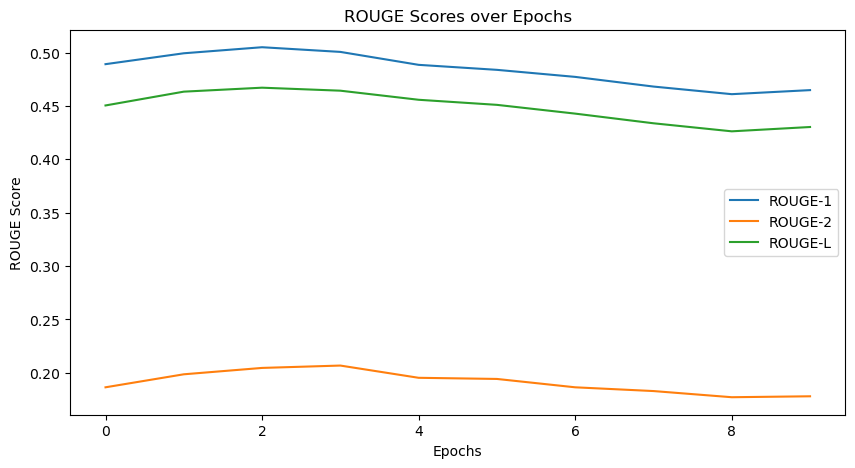

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(rouge1_scores, label='ROUGE-1')
plt.plot(rouge2_scores, label='ROUGE-2')
plt.plot(rougeL_scores, label='ROUGE-L')
plt.xlabel('Epochs')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores over Epochs')
plt.legend()
plt.show()

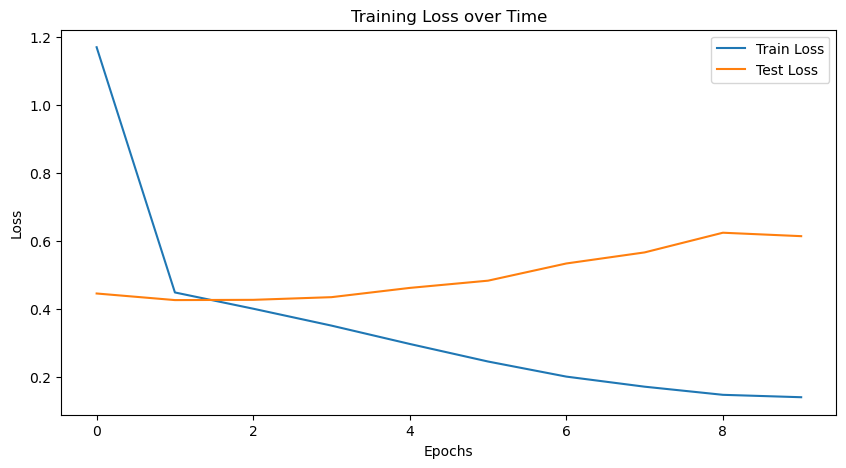

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()
plt.show()

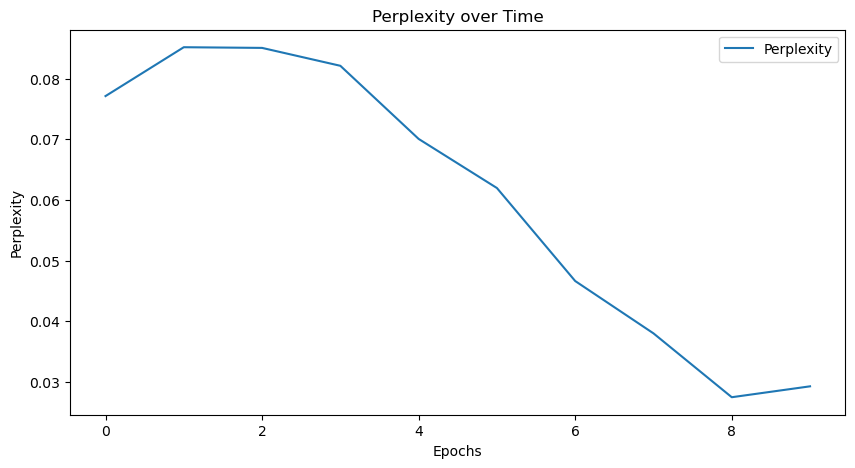

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(perplexity_scores, label='Perplexity')
plt.xlabel('Epochs')
plt.ylabel('Perplexity')
plt.title('Perplexity over Time')
plt.legend()
plt.show()

In [17]:
question = "What is a good tip for investment?"
answer = chat(PROJECT_NAME, question, device)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: What is a good tip for investment?
Answer: take a close look at the numbers more likely than not that the investment is made only by a small investment


In [12]:
question = "Whats up?"
answer = chat(PROJECT_NAME, question, device)
print(f"Question: {question}")
print(f"Answer: {answer}")

/opt/conda/envs/pytorch/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/conda/envs/pytorch/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Question: Whats up?
Answer: The sky's up but I'm fine thanks. What financial questions do you have for me today?


In [13]:
question = "When should I file taxes?"
answer = chat(PROJECT_NAME, question, device)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: When should I file taxes?
Answer: when the due date for filing your return for the year


In [15]:
question = "What does stock represent?"
answer = chat(PROJECT_NAME, question, device)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: What does stock represent?
Answer: a share of ownership in a corporation
